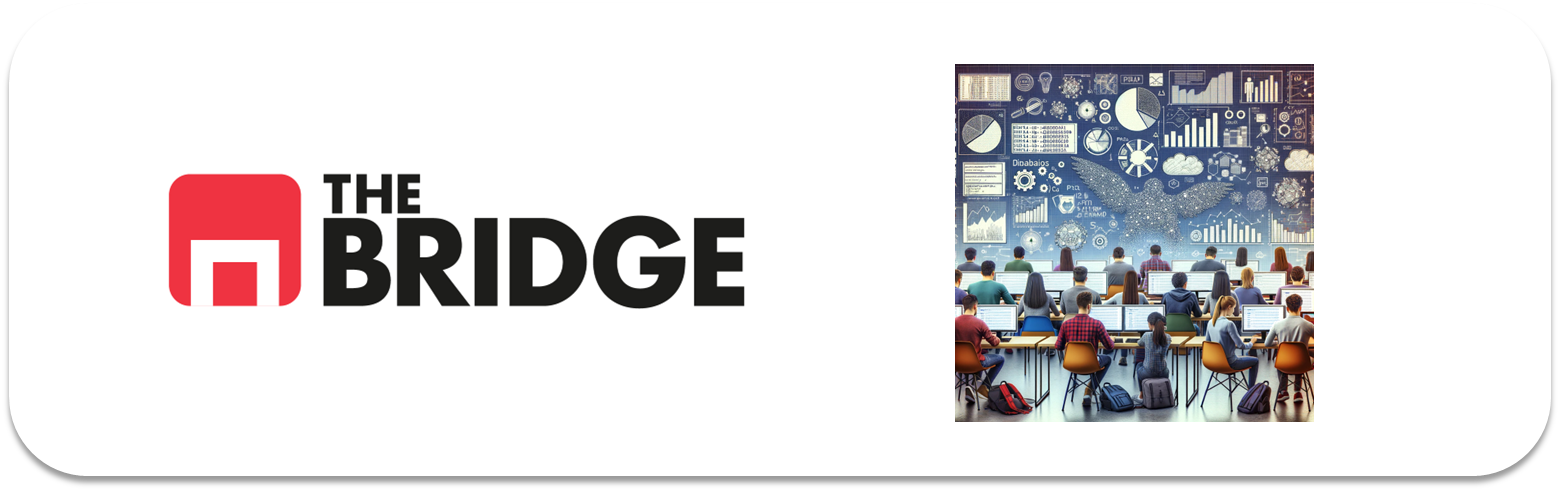

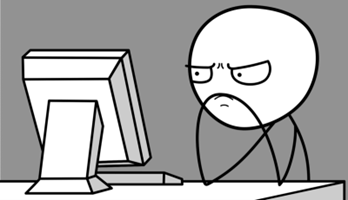

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms
from sklearn.model_selection import train_test_split

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [2]:
df_advert = pd.read_csv("./data/advertising_ml.csv")

In [3]:
df_advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

* Tipo de problema: Clasificacion - Si hace clic o no
* Tipo de aprendizaje: Supervisado
* Variable target: Clicked on Ad

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [4]:
df_advert.nunique()

Daily Time Spent on Site     900
Age                           83
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [5]:
df_tipificacion = pd.DataFrame([df_advert.nunique(), df_advert.nunique()/len(df_advert) * 100, df_advert.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
Daily Time Spent on Site,900,90.0,float64
Age,83,8.3,object
Area Income,1000,100.0,float64
Daily Internet Usage,966,96.6,float64
Ad Topic Line,1000,100.0,object
City,969,96.9,object
Male,2,0.2,int64
Country,237,23.7,object
Timestamp,1000,100.0,object
Clicked on Ad,2,0.2,int64


| Columna                      | Descripción                                                    | Tipo pandas | Cardinalidad | Tipo de variable                       |
| ---------------------------- | -------------------------------------------------------------- | ----------- | ------------ | -------------------------------------- |
| **Daily Time Spent on Site** | Tiempo medio diario (en minutos) que el usuario pasa en la web | float64     | 900          | Numérica continua                      |
| **Age**                      | Edad del usuario                                               | object      | 83           | Numérica discreta *(mal tipada)*       |
| **Area Income**              | Ingresos medios del área geográfica del usuario                | float64     | 1000         | Numérica continua                      |
| **Daily Internet Usage**     | Uso diario medio de internet del usuario (en minutos)          | float64     | 966          | Numérica continua                      |
| **Ad Topic Line**            | Texto o slogan del anuncio mostrado                            | object      | 1000         | Categórica nominal (alta cardinalidad) |
| **City**                     | Ciudad de residencia del usuario                               | object      | 969          | Categórica nominal (alta cardinalidad) |
| **Male**                     | Género del usuario (1 = hombre, 0 = mujer)                     | int64       | 2            | Categórica binaria                     |
| **Country**                  | País del usuario                                               | object      | 237          | Categórica nominal                     |
| **Timestamp**                | Fecha y hora en la que el usuario vio el anuncio               | object      | 1000         | Temporal *(debería ser datetime)*      |
| **Clicked on Ad**            | Indica si el usuario hizo clic en el anuncio (0 = sí, 1 = no)  | int64       | 2            | **Categórica binaria (target)**        |


### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [6]:
df_advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [7]:
df_advert["Age"] = (df_advert["Age"].str.extract(r"(\d+)")).astype(int)

In [8]:
df_advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [9]:
df_advert.Timestamp = pd.to_datetime(df_advert["Timestamp"])

In [10]:
df_advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.3+ KB


### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [12]:
train_set, test_set = train_test_split(df_advert, test_size=0.2, random_state=42)

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

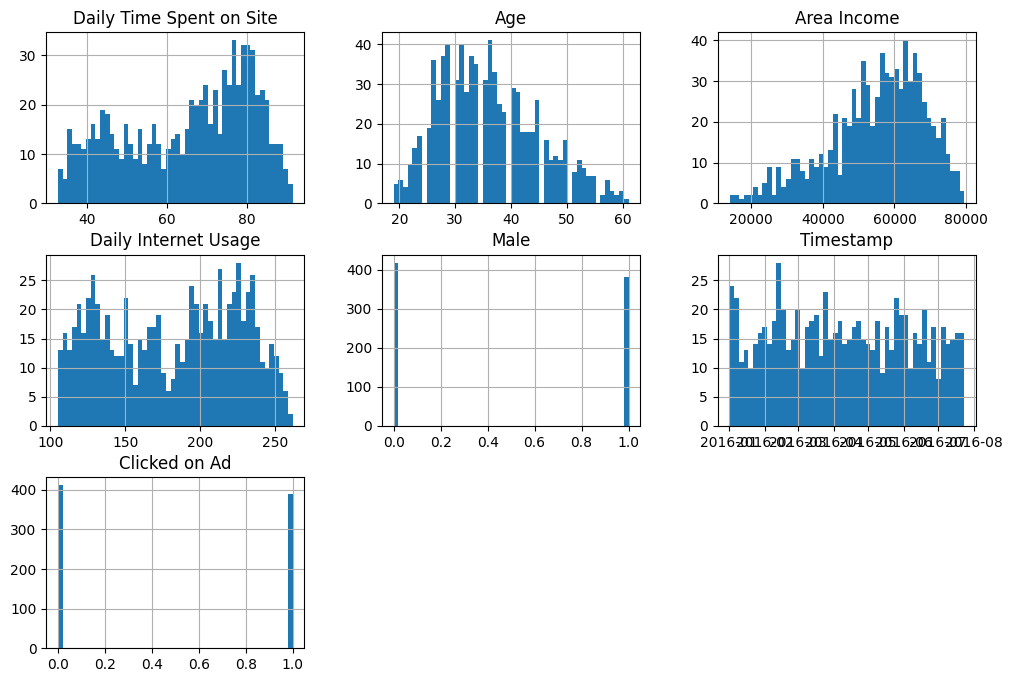

In [13]:
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

In [28]:
continuous_vars = [
    "Daily Time Spent on Site",
    "Area Income",
    "Age",
    "Daily Internet Usage"
]

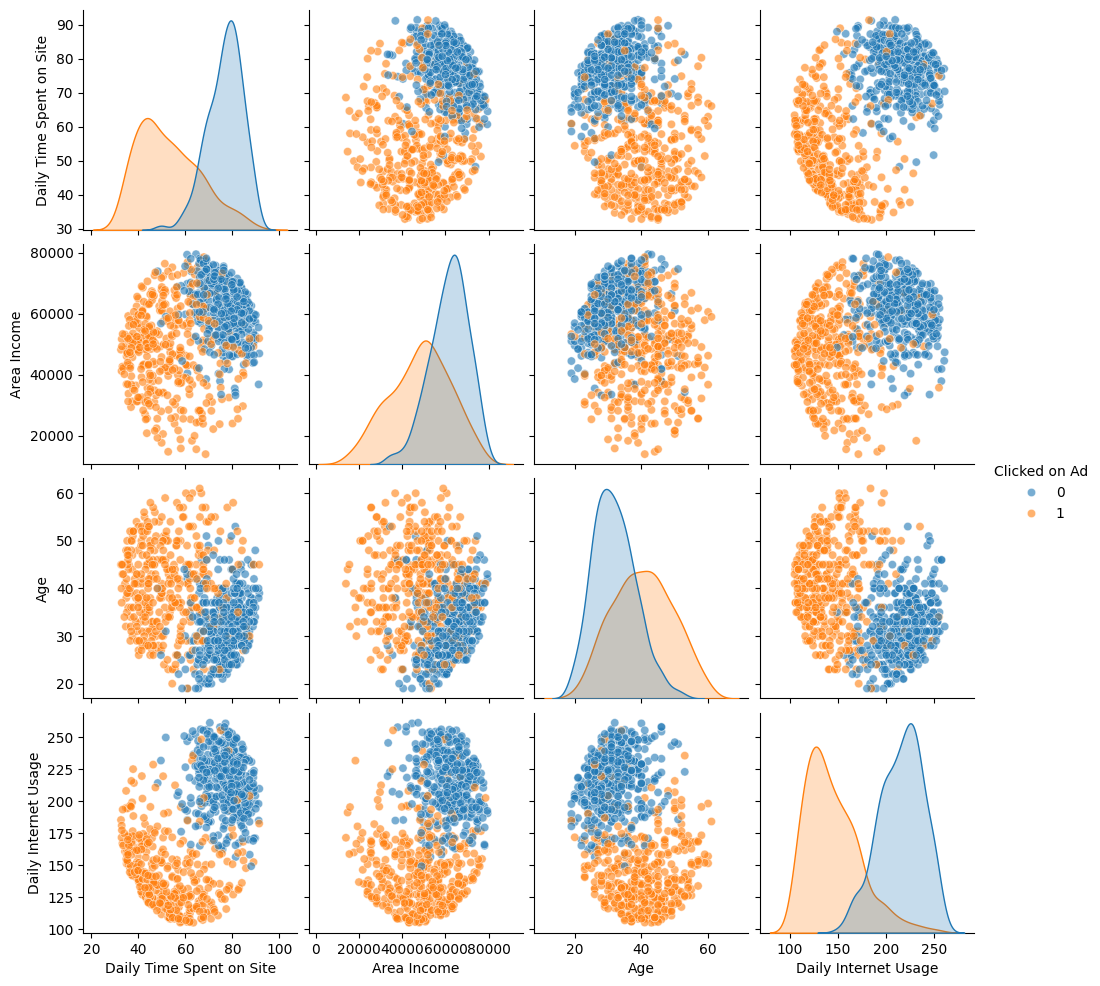

In [35]:
sns.pairplot(
    train_set,
    vars= continuous_vars,
    hue="Clicked on Ad",
    kind="scatter",
    plot_kws={"alpha": 0.6}
)

plt.show()

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

##### Seleccion de features:
* Daily Time Spent on Site
* Daily Internet Usage
* Age
